In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.metrics import make_scorer, cohen_kappa_score




In [4]:
df = pd.read_csv('/Users/aref/Documents/data_in_education/big_data_in_education/data/a1-in.csv')

In [5]:
df.shape

(27731, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27731 entries, 0 to 27730
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNIQUEID               27731 non-null  int64  
 1   SCHOOL                 27731 non-null  object 
 2   Class                  27731 non-null  object 
 3   GRADE                  27731 non-null  int64  
 4   CODER                  27731 non-null  object 
 5   STUDENTID              27731 non-null  int64  
 6   Gender                 27731 non-null  int64  
 7   OBSNUM                 27731 non-null  int64  
 8   totalobs-forsession    27731 non-null  int64  
 9   Activity               27731 non-null  object 
 10  ONTASK                 27731 non-null  object 
 11  TRANSITIONS            27731 non-null  int64  
 12  NumACTIVITIES          27731 non-null  int64  
 13  FORMATchanges          27731 non-null  int64  
 14  NumFORMATS             27731 non-null  int64  
 15  Ob

In [7]:
df.sample(10)

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
17655,32055,B,T9T,2,Z,857436,0,12,227,Individual,N,3,4,3,4,633.500000,0.003261,488
15772,30172,C,T0V,4,Z,584083,0,10,189,Smallgroup,N,4,5,1,2,763.000000,0.001644,727
21013,35413,A,T8VQ,4,Z,489025,0,11,207,Individual,N,2,3,2,3,929.666667,0.002016,861
23223,37623,D,T7V,4,Z,550019,0,3,49,Smallgroup,Y,1,2,0,1,1239.000000,0.000404,432
6507,20907,A,T8VQ,4,Z,15210,0,8,133,Wholecarpet,Y,1,2,1,2,1677.000000,0.000446,1101
17967,32367,B,T9U,3,Z,947374,1,12,248,Smallgroup,N,2,3,2,3,890.333333,0.002545,404
3599,17999,B,T9V,4,Z,696887,1,15,290,Wholedesks,Y,3,4,2,3,747.000000,0.002712,84
23263,37663,D,T7V,4,Z,690272,1,5,89,Smallgroup,Y,1,2,0,1,1239.000000,0.000404,772
9511,23911,D,T7V,4,Z,129105,1,16,323,Smallgroup,N,2,3,1,2,1065.666667,0.001068,1115
12937,27337,C,T0Q,0,Y,416211,1,8,132,Wholecarpet,N,0,1,0,1,2735.000000,0.000000,904


In [14]:
df['CODER'].unique()

array(['Z', 'Y'], dtype=object)

In [24]:
unique_values = df.apply(lambda col: col.unique())

for col_name, values in unique_values.items():
    print(f"Unique values in '{col_name}': {values}")

Unique values in 'UNIQUEID': [14400 14401 14402 ... 42128 42129 42130]
Unique values in 'SCHOOL': ['B' 'A' 'D' 'E' 'C']
Unique values in 'Class': ['T9Q' 'T9S' 'T9T' 'T9U' 'T9V' 'T8Q' 'T8S' 'T8T' 'T8VQ' 'T8R' 'T7Q' 'T7T'
 'T7V' 'T6Q' 'T6S' 'T6T' 'T6V' 'T0Q' 'T0S' 'T0T' 'T0U' 'T0V']
Unique values in 'GRADE': [0 1 2 3 4]
Unique values in 'CODER': ['Z' 'Y']
Unique values in 'STUDENTID': [600865 596466 616590 ... 804146 307477 497644]
Unique values in 'Gender': [0 1]
Unique values in 'OBSNUM': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
Unique values in 'totalobs-forsession': [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  

In [43]:
X = df.drop('ONTASK', axis=1)

In [27]:
X

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,14400,B,T9Q,0,Z,600865,0,1,0,Wholecarpet,3,4,1,2,770.5,0.004043,0
1,14401,B,T9Q,0,Z,596466,0,1,1,Wholecarpet,3,4,1,2,770.5,0.004043,23
2,14402,B,T9Q,0,Z,616590,0,1,2,Wholecarpet,3,4,1,2,770.5,0.004043,25
3,14403,B,T9Q,0,Z,734358,1,1,3,Wholecarpet,3,4,1,2,770.5,0.004043,27
4,14404,B,T9Q,0,Z,826308,1,1,4,Wholecarpet,3,4,1,2,770.5,0.004043,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27726,42126,C,T0V,4,Z,979370,0,17,343,Wholedesks,4,5,1,2,730.2,0.003600,1094
27727,42127,C,T0V,4,Z,796316,1,16,344,Wholedesks,4,5,1,2,730.2,0.003600,1097
27728,42128,C,T0V,4,Z,890896,1,16,345,Wholedesks,4,5,1,2,730.2,0.003600,1101
27729,42129,C,T0V,4,Z,506875,0,17,346,Wholedesks,4,5,1,2,730.2,0.003600,1104


In [8]:
y = df['ONTASK']
print(y)

0        Y
1        Y
2        Y
3        Y
4        Y
        ..
27726    Y
27727    Y
27728    Y
27729    Y
27730    N
Name: ONTASK, Length: 27731, dtype: object


In [62]:
X_encoded = pd.get_dummies(X, columns = ['SCHOOL', 'Class', 'CODER', 'Activity'], drop_first=True)
print(X_encoded)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.2, random_state=42)

print(f'Training set size: {X_train}')
print(f'Test set size: {X_test.shape}')

Training set size:        UNIQUEID  GRADE  STUDENTID  Gender  OBSNUM  totalobs-forsession  \
21539     35939      4     250902       0       9                  172   
24447     38847      1     320031       0      10                  159   
18673     33073      4     745611       0       2                   23   
18491     32891      4     527129       0       7                  130   
21686     36086      4     651127       1       2                   35   
...         ...    ...        ...     ...     ...                  ...   
21575     35975      4     444032       1      10                  208   
5390      19790      2     893587       0      15                  242   
860       15260      1     670377       0       9                  140   
15795     30195      4     180177       1      11                  212   
23654     38054      4     645090       1      12                  212   

       TRANSITIONS  NumACTIVITIES  FORMATchanges  NumFORMATS  ...  Class_T9S  \
21539       

In [75]:
clf = DecisionTreeClassifier(min_samples_split = 10, random_state=42)

In [88]:
clf.fit(X_encoded, y)

DecisionTreeClassifier(min_samples_split=10, random_state=42)

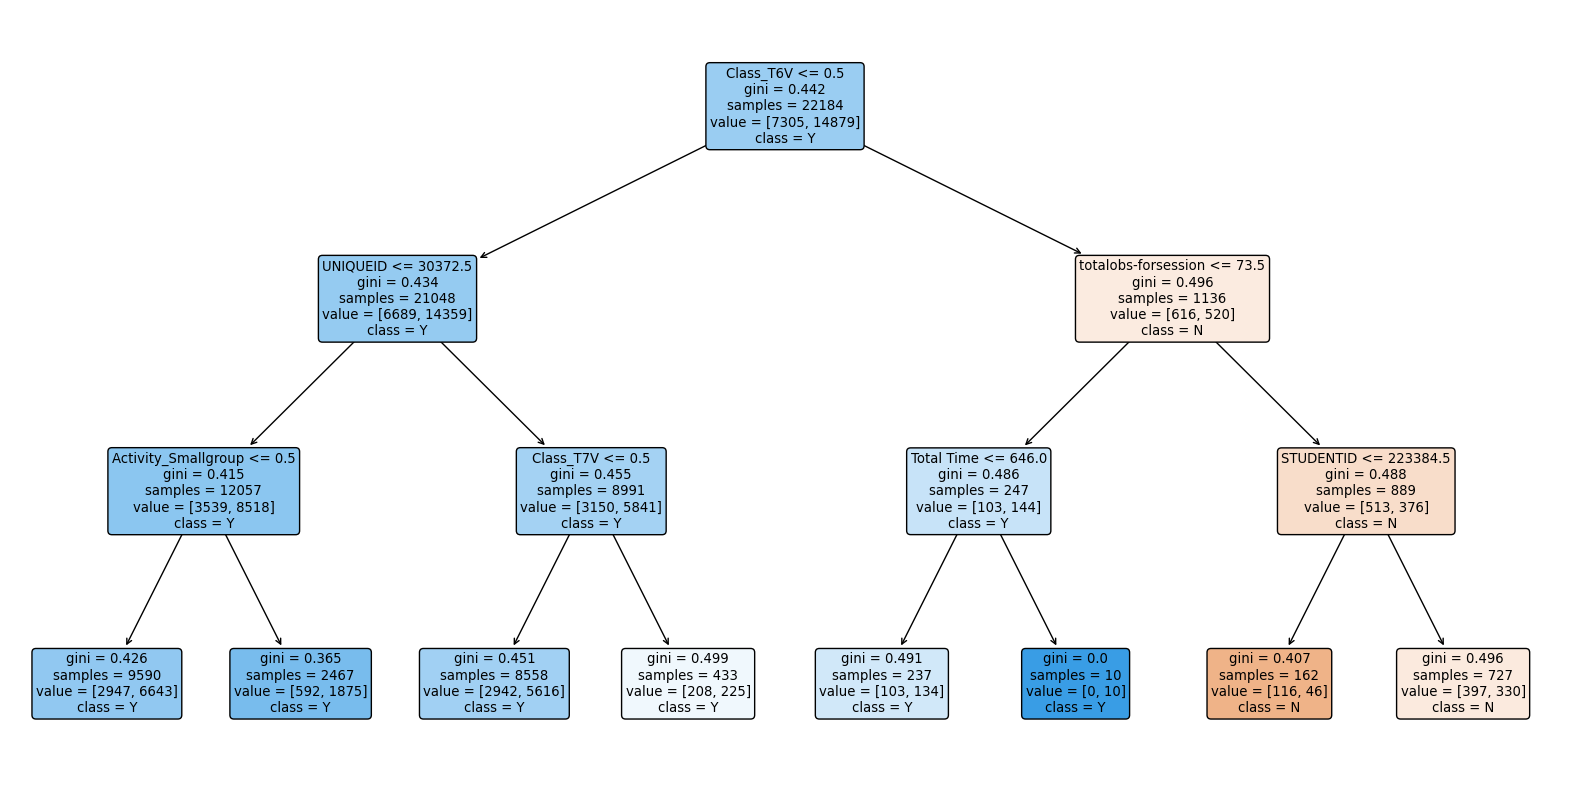

In [116]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=list(X_encoded.columns), class_names=['N', 'Y'], rounded=True)
plt.show()


In [81]:
X_encoded.columns

Index(['UNIQUEID', 'GRADE', 'STUDENTID', 'Gender', 'OBSNUM',
       'totalobs-forsession', 'TRANSITIONS', 'NumACTIVITIES', 'FORMATchanges',
       'NumFORMATS', 'Obsv/act', 'Transitions/Durations', 'Total Time',
       'SCHOOL_B', 'SCHOOL_C', 'SCHOOL_D', 'SCHOOL_E', 'Class_T0S',
       'Class_T0T', 'Class_T0U', 'Class_T0V', 'Class_T6Q', 'Class_T6S',
       'Class_T6T', 'Class_T6V', 'Class_T7Q', 'Class_T7T', 'Class_T7V',
       'Class_T8Q', 'Class_T8R', 'Class_T8S', 'Class_T8T', 'Class_T8VQ',
       'Class_T9Q', 'Class_T9S', 'Class_T9T', 'Class_T9U', 'Class_T9V',
       'CODER_Z', 'Activity_Individual', 'Activity_Smallgroup',
       'Activity_Testing', 'Activity_Wholecarpet', 'Activity_Wholedesks'],
      dtype='object')

In [89]:
y_pred = clf.predict(X_encoded)

In [90]:
y_pred

array(['Y', 'Y', 'Y', ..., 'Y', 'Y', 'N'], dtype=object)

In [92]:
kappa = cohen_kappa_score(y, y_pred)
kappa

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.6873985938345052
              precision    recall  f1-score   support

           N       0.62      0.08      0.14      1790
           Y       0.69      0.98      0.81      3757

    accuracy                           0.69      5547
   macro avg       0.66      0.53      0.48      5547
weighted avg       0.67      0.69      0.59      5547



In [45]:
# kappa if we exclude 'students'

X_no_student = df.drop(['ONTASK', 'STUDENTID', 'SCHOOL', 'Class', 'CODER', 'UNIQUEID'], axis=1)

In [12]:
X_no_studnet_encoded = pd.get_dummies(X_no_student, drop_first=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_no_studnet_encoded, y, test_size = 0.2, random_state = 42)

In [140]:
print(f'Training set size: {X_train}')
print(f'Test set size: {X_test.shape}')

Training set size:        GRADE  Gender  OBSNUM  totalobs-forsession  TRANSITIONS  NumACTIVITIES  \
21539      4       0       9                  172            3              4   
24447      1       0      10                  159            4              5   
18673      4       0       2                   23            3              4   
18491      4       0       7                  130            2              3   
21686      4       1       2                   35            1              2   
...      ...     ...     ...                  ...          ...            ...   
21575      4       1      10                  208            3              4   
5390       2       0      15                  242            2              3   
860        1       0       9                  140            1              2   
15795      4       1      11                  212            4              5   
23654      4       1      12                  212            0              1   

       F

In [141]:
clf = DecisionTreeClassifier(min_samples_split = 10, random_state = 42)

In [ ]:
clf.fit(X_no_studnet_encoded, y_test)

In [167]:
y_pred = clf.predict(X_no_studnet_encoded)

In [168]:
kappa = cohen_kappa_score(y, y_pred)
kappa

0.7036581293248865

In [7]:
nb_model = GaussianNB()
nb_model.fit(X_no_studnet_encoded, y)

GaussianNB()

In [9]:
y_pred = nb_model.predict(X_no_studnet_encoded)

In [10]:
kappa = cohen_kappa_score(y, y_pred)

In [11]:
kappa

0.03157187010965745

In [153]:
accuracy_nb = accuracy_score(y, y_pred)
accuracy_nb

0.6663661606144747

# Extreme Gradient Boosting

In [86]:
xgb = XGBClassifier(learning_rate = 0.5, n_estimators = 200, random_state = 5)

In [24]:
X_no_studnet_encoded = pd.get_dummies(X_no_student, columns = ['Activity'], drop_first=True)

In [33]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_no_studnet_encoded, y_encoded, test_size=0.2, random_state=42)

In [88]:
xgb.fit(X_no_studnet_encoded, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=5, ...)

In [41]:
y_pred = xgb.predict(X_no_studnet_encoded)

In [89]:
kappa = cohen_kappa_score(y_encoded, y_pred)
kappa

0.33826379739669155

# N-fold Cross-validation using XGBClassifier

In [91]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [90]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [98]:
xgb = XGBClassifier(learning_rate=0.5, n_estimators=200, random_state=5)

In [100]:
group_kfold = GroupKFold(n_splits = 10)
kappa_scorer = make_scorer(cohen_kappa_score)
groups = np.random.randint(0, 10, size = len(X_no_studnet_encoded))

In [101]:
scores = cross_val_score(xgb, X_no_studnet_encoded, y_encoded, cv = group_kfold, groups = groups, scoring = kappa_scorer)

In [102]:
np.mean(scores)

0.1326946591392591

In [60]:
xgb.fit(X_no_studnet_encoded, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
y_predict = xgb.predict(X_no_studnet_encoded)

In [62]:
kappa = cohen_kappa_score(y_encoded, y_predict)
kappa

0.33826379739669155

In [65]:
kappa_scorer = make_scorer(cohen_kappa_score)

In [66]:
kappa_scores = cross_val_score(xgb, X_no_studnet_encoded, y_encoded, cv = kf, scoring = kappa_scorer)
kappa_scores

array([0.10177775, 0.14058542, 0.12539021, 0.12364306, 0.13095772,
       0.12252711, 0.1130317 , 0.11022708, 0.12097843, 0.1186101 ])

### N-fold Cross-validation using Deciison Tree Classifier

In [67]:
dt = DecisionTreeClassifier(random_state = 42)

In [68]:
cross_val_score(dt,X_no_studnet_encoded, y_encoded, cv = kf, scoring = 'accuracy')

array([0.58976208, 0.619185  , 0.59935088, 0.60620267, 0.61666066,
       0.61305445, 0.58240173, 0.60836639, 0.60115398, 0.60476019])

In [69]:
kappa_scorer = make_scorer(cohen_kappa_score)

In [70]:
kappa_scores = cross_val_score(dt, X_no_studnet_encoded, y_encoded, cv = kf, scoring = kappa_scorer)

In [71]:
kappa_scores

array([0.07178851, 0.11967831, 0.10580607, 0.10424126, 0.1259429 ,
       0.12681461, 0.05715388, 0.11143718, 0.09459129, 0.10141942])

In [75]:
groups = np.random.randint(0, 10, size = len(X_no_studnet_encoded))

In [92]:
group_kfold = GroupKFold(n_splits = 10)

In [77]:
dt = DecisionTreeClassifier(random_state = 42)

In [78]:
scores = cross_val_score(dt, X_no_studnet_encoded, y_encoded, cv = group_kfold, groups = groups, scoring='accuracy')

In [79]:
kappa_scorer = make_scorer(cohen_kappa_score)

In [80]:
kappa_scores = cross_val_score(dt, X_no_studnet_encoded, y_encoded, cv = group_kfold, groups = groups, scoring = kappa_scorer)
kappa_scores

array([0.08045874, 0.10189375, 0.09779458, 0.12420549, 0.08575549,
       0.10323992, 0.10401068, 0.12666956, 0.09078488, 0.09138789])

In [81]:
np.mean(kappa_scores)

0.10062009781533048

# N-fold Cross-validation using Naive Bayes

In [82]:
nb_model = GaussianNB()
nb_model.fit(X_no_studnet_encoded, y)

GaussianNB()

In [84]:
kappa_score_nb = cross_val_score(nb_model, X_no_studnet_encoded, y, cv = group_kfold, groups = groups, scoring = kappa_scorer)

In [85]:
np.mean(kappa_score_nb)

0.031046088807354533